In [ ]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install yfinance
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install datetime
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")
import datetime

In [2]:
end = "2023-03-10"
start = "2022-03-01"
symbol=['AAPL','MSFT','TSLA']
stock_data={}
for stock in symbol:
    stock_data[stock]= yf.download(stock,start,end, auto_adjust=True,ignore_tz=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


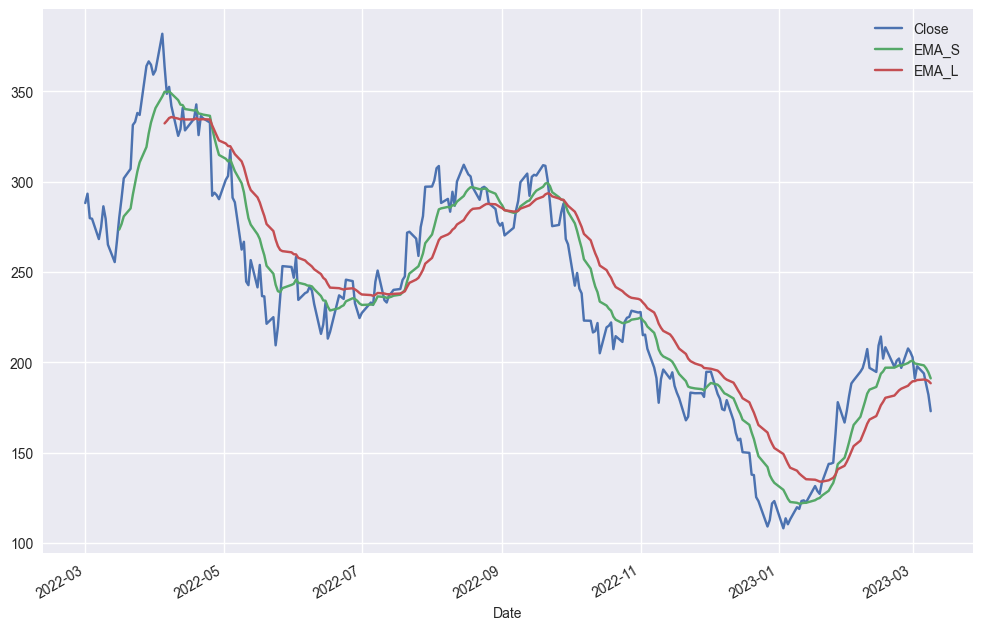

In [3]:
ema_s = 12 # EMA Short
ema_l = 26 # EMA Long
data=stock_data['TSLA']
data["EMA_S"] = data.Close.ewm(span = ema_s, min_periods = ema_s).mean() 
data["EMA_L"] = data.Close.ewm(span = ema_l, min_periods = ema_l).mean() 
data[['Close', 'EMA_S', 'EMA_L']].plot(figsize = (12, 8))
plt.show()

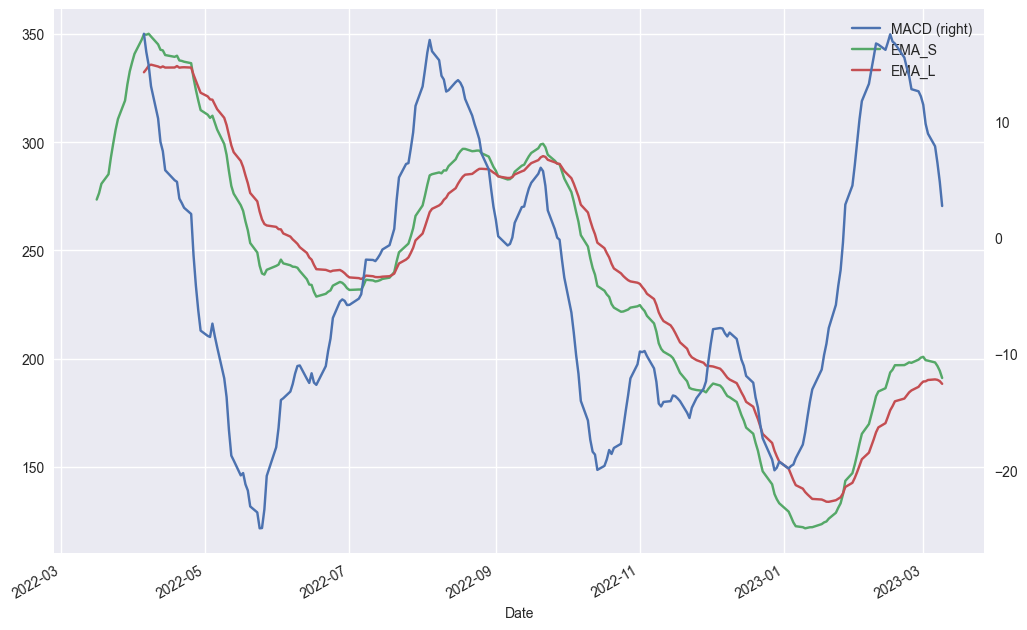

In [4]:
data["MACD"] = data.EMA_S - data.EMA_L
data[['MACD', 'EMA_S', 'EMA_L']].plot(figsize = (12, 8), secondary_y = "MACD")
plt.show()